### Exploratory Data Analysis

Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.set_option("display.max_rows", None)     # show all rows
pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.width", None)       # don't wrap columns

Finding the ID of the UCI dataset

In [2]:
from ucimlrepo import fetch_ucirepo
Cardiotocography = fetch_ucirepo(name = 'Cardiotocography')
print(Cardiotocography.metadata.uci_id)

193


Importing data from UCI dataset

In [3]:
from ucimlrepo import fetch_ucirepo
Cardiotocography = fetch_ucirepo(id = 193)
print(Cardiotocography.metadata)

{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

Get the features and target of the dataframe

In [4]:
X = Cardiotocography.data.features
Y = Cardiotocography.data.targets["NSP"]
dataframe = pd.concat([X,Y], axis = 1)
print(dataframe.head())

    LB     AC   FM     UC     DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
0  120  0.000  0.0  0.000  0.000  0.0  0.0    73   0.5    43   2.4     64   
1  132  0.006  0.0  0.006  0.003  0.0  0.0    17   2.1     0  10.4    130   
2  133  0.003  0.0  0.008  0.003  0.0  0.0    16   2.1     0  13.4    130   
3  134  0.003  0.0  0.008  0.003  0.0  0.0    16   2.4     0  23.0    117   
4  132  0.007  0.0  0.008  0.000  0.0  0.0    16   2.4     0  19.9    117   

   Min  Max  Nmax  Nzeros  Mode  Mean  Median  Variance  Tendency  NSP  
0   62  126     2       0   120   137     121        73         1    2  
1   68  198     6       1   141   136     140        12         0    1  
2   68  198     5       1   141   135     138        13         0    1  
3   53  170    11       0   137   134     137        13         1    1  
4   53  170     9       0   137   136     138        11         1    1  


In [5]:
Y.shape

(2126,)

Check for missing values (No missing values in this dataset)

In [6]:
print(dataframe.isnull().any())

LB          False
AC          False
FM          False
UC          False
DL          False
DS          False
DP          False
ASTV        False
MSTV        False
ALTV        False
MLTV        False
Width       False
Min         False
Max         False
Nmax        False
Nzeros      False
Mode        False
Mean        False
Median      False
Variance    False
Tendency    False
NSP         False
dtype: bool


Check for duplicate data and remove duplicates

In [7]:
print("Number of duplicates in this dataset:", dataframe.duplicated().sum())
duplicates = dataframe[dataframe.duplicated()]
print(duplicates)

Number of duplicates in this dataset: 13
       LB     AC     FM     UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
68    140  0.007  0.000  0.004  0.0  0.0  0.0    34   1.2     0  10.3     60   
234   123  0.000  0.000  0.000  0.0  0.0  0.0    49   0.8     7  13.8     74   
306   145  0.000  0.020  0.000  0.0  0.0  0.0    77   0.2    45   5.8     21   
324   135  0.000  0.000  0.000  0.0  0.0  0.0    62   0.5    71   6.9     97   
333   144  0.000  0.019  0.000  0.0  0.0  0.0    76   0.4    61  10.6     81   
787   123  0.003  0.003  0.000  0.0  0.0  0.0    52   0.8     2  15.4     90   
791   123  0.003  0.004  0.000  0.0  0.0  0.0    50   0.9     4  14.8     82   
798   146  0.000  0.000  0.003  0.0  0.0  0.0    65   0.4    39   7.0     19   
849   138  0.002  0.000  0.004  0.0  0.0  0.0    41   0.8     8  10.3     51   
1113  122  0.000  0.000  0.000  0.0  0.0  0.0    19   1.9     0  15.1     39   
1114  122  0.000  0.000  0.000  0.0  0.0  0.0    19   1.9     0  15.1     39   

In [8]:
dataframe = dataframe.drop_duplicates().reset_index(drop = True)
print(dataframe)

       LB     AC     FM     UC     DL     DS     DP  ASTV  MSTV  ALTV  MLTV  \
0     120  0.000  0.000  0.000  0.000  0.000  0.000    73   0.5    43   2.4   
1     132  0.006  0.000  0.006  0.003  0.000  0.000    17   2.1     0  10.4   
2     133  0.003  0.000  0.008  0.003  0.000  0.000    16   2.1     0  13.4   
3     134  0.003  0.000  0.008  0.003  0.000  0.000    16   2.4     0  23.0   
4     132  0.007  0.000  0.008  0.000  0.000  0.000    16   2.4     0  19.9   
5     134  0.001  0.000  0.010  0.009  0.000  0.002    26   5.9     0   0.0   
6     134  0.001  0.000  0.013  0.008  0.000  0.003    29   6.3     0   0.0   
7     122  0.000  0.000  0.000  0.000  0.000  0.000    83   0.5     6  15.6   
8     122  0.000  0.000  0.002  0.000  0.000  0.000    84   0.5     5  13.6   
9     122  0.000  0.000  0.003  0.000  0.000  0.000    86   0.3     6  10.6   
10    151  0.000  0.000  0.001  0.001  0.000  0.000    64   1.9     9  27.6   
11    150  0.000  0.000  0.001  0.001  0.000  0.000 

Splitting the dataframe again: to update Y and X

In [35]:
X = dataframe.drop("NSP", axis=1)  # features only
Y = dataframe["NSP"]                # target column

In [10]:
Y.shape

(2113,)

# Checking for outliers 

Boxplots flag statistical outliers using fixed rules (IQR), but with a relatively small dataset (~2,000 records), this may remove values that are clinically valid. Instead, we assess outliers against clinically permissible ranges, ensuring only physiologically implausible values are flagged.

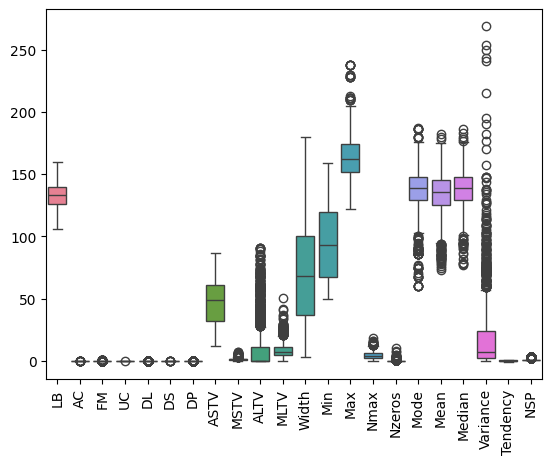

In [11]:
sns.boxplot(data=dataframe)
plt.xticks(rotation=90)   # rotate x labels if too many columns
plt.show()

Statistical Measures of the Data

In [12]:
print(dataframe.describe().transpose())

           count        mean        std    min      25%      50%      75%  \
LB        2113.0  133.304780   9.837451  106.0  126.000  133.000  140.000   
AC        2113.0    0.003188   0.003871    0.0    0.000    0.002    0.006   
FM        2113.0    0.009517   0.046804    0.0    0.000    0.000    0.003   
UC        2113.0    0.004387   0.002941    0.0    0.002    0.005    0.007   
DL        2113.0    0.001901   0.002966    0.0    0.000    0.000    0.003   
DS        2113.0    0.000003   0.000057    0.0    0.000    0.000    0.000   
DP        2113.0    0.000159   0.000592    0.0    0.000    0.000    0.000   
ASTV      2113.0   46.993848  17.177782   12.0   32.000   49.000   61.000   
MSTV      2113.0    1.335021   0.884368    0.2    0.700    1.200    1.700   
ALTV      2113.0    9.795078  18.337073    0.0    0.000    0.000   11.000   
MLTV      2113.0    8.166635   5.632912    0.0    4.600    7.400   10.800   
Width     2113.0   70.535258  39.007706    3.0   37.000   68.000  100.000   

## Deductions: 

None of the features from (LB - MLTV) have negative error values since their min is >=0.

1. Baseline Heart Rate (LB) - The minimum and the maximum for Baseline Heart Rate is 106bpm and 160bpm respectively. The healthy baseline heart range is between 110 - 160bpm. The min value 106bpm does not fall in the healthy range but it is not a medically unreasonable value.

2. Accelerations (AC) : Since this feature is normalized and the exact recording duration is not provided, we cannot directly convert the values back to raw counts. However, by definition, each acceleration must last at least 15 seconds. This means that in one minute (60 seconds), the maximum possible number of accelerations is (60 ÷ 15 = 4). Expressed as a rate, this equals 0.07 accelerations per second (4 ÷ 60). Therefore, 0.07 per second is a practical upper limit, and any record with AC values greater than this threshold can be considered physiologically implausible and likely erroneous. However, none of the records have AC values > 0.07. (The max of AC is 0.019)

3. Uterine contractions (UC) – They are quantified as the number of contractions present in a 10 min period and averaged over 30 min. Normal: ≤ 5 contractions in 10 min. Thus (5 contractions/ 10mins(600sec))
= 0.0083 contractions/min. (The max is 0.015 which is greater than the normal level of contractions indicating presence of babies with Tachysystole - excessively frequent uterine contractions)

4. Light Declarations, Severe Declarations and Prolonged Declarations: Extremely rare (so most values are 0) - 25%, 50% and 75% are all 0. However, the maximum of these features are still in the medically plausible range hence we will still consider it. 

5. ASTV and ALTV is between 0% to 100%: so there are no outliers.

6. MSTV > 3bpm: Normal but MSTV < 3bpm: may indicate hypoxia, fetal sleep, or medication effect. 

7. MLTV > 5bpm: Normal but MLTV < 5bpm: indicates fetal irresponsiveness

8. Fetal Movements (FM): Interpreting outliers in this feature is challenging. The variable is normalized to a per second rate, but the dataset does not provide explicit information about the actual recording duration. Without knowing the underlying observation period, it is difficult to translate these normalized values back into counts of movements, making it hard to assess whether the extreme values are true physiological outliers or artifacts.


Correlation Plot

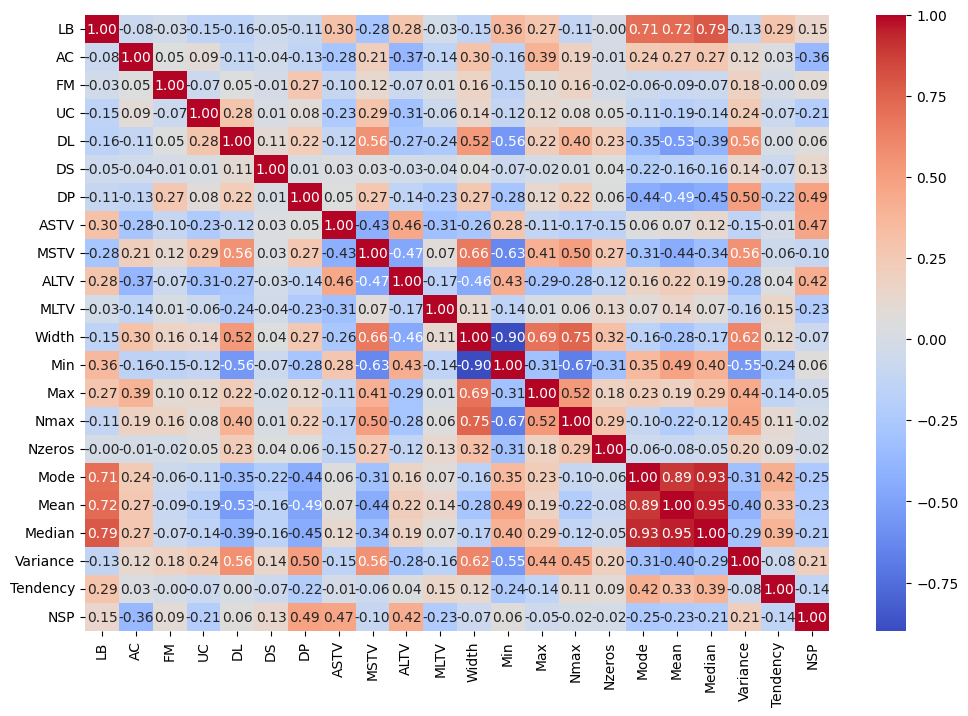

In [13]:
corrplot = dataframe.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrplot, annot=True, cmap="coolwarm", fmt =".2f")
plt.show()


Deductions:

1. NSP has a high correlation with DP, ASTV and CLASS. 

2. Mean, Median and Mode (almost identical correlations). They all measure central tendancy of fetal heart rate so they carry overlapping information.They reinforce each other but do not add much new info. Keeping all of these measures are redundant

3. Variance has a high correlation with DL, MSTV, ALTV, Width, Min, Max and Nmax.

4. DL has a high correlation with Min, Width and MSTV and Variance. 

5. DP has a high correlation with Mean. 

6. ASTV has a high correlation with MSTV. 

7. Width has a high correlation with MSTV. 

8. NMax has a high correlation with MSTV, Width, Min, Max and Variance. 

## Feature Engineering
Based on features that have a greater impact on the target

In [36]:
def add_stv_ac_altv_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    eps = 1e-6

# Build a compact STV composite
    stv_cols = [c for c in ["ASTV", "MSTV", "MLTV"] if c in out.columns]
    if stv_cols:
        out["STV_Composite"] = out[stv_cols].mean(axis=1)
    else:
        out["STV_Composite"] = np.nan  # if none present, stays NaN

# STV vs ALTV (normalized comparison)
    if "ALTV" in out.columns:
        out["STV_ALTV_Ratio"] = out["STV_Composite"] / (out["ALTV"] + eps)
        out["STV_ALTV_Diff"]  = out["STV_Composite"] - out["ALTV"]

# AC relative to STV (movement/accel vs variability)
    if "AC" in out.columns:
        out["AC_STV_Ratio"] = out["AC"] / (out["STV_Composite"] + eps)

# Interaction between AC and ALTV (often predictive)
    if {"AC","ALTV"}.issubset(out.columns):
        out["ACxALTV"] = out["AC"] * out["ALTV"]

# STV shape: short-term vs long-term variability
    if {"MSTV","MLTV"}.issubset(out.columns):
        out["STV_Shape_Ratio"] = out["MSTV"] / (out["MLTV"] + eps)

# Discrepancy between two STV measures (if present)
    if {"ASTV","MSTV"}.issubset(out.columns):
        out["ASTV_minus_MSTV"] = out["ASTV"] - out["MSTV"]

# Clean divisions
    out.replace([np.inf, -np.inf], np.nan, inplace=True)
    return out

In [15]:
df = add_stv_ac_altv_features(dataframe)

In [ ]:
dataframe = dataframe.drop(columns=['Mean', 'Mode'])
# dropping these columns (to help redundancy of the model) does not affect the accuracy of the model

In [17]:
# Calculate skewness for all numeric columns in X
skew_values = X.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)

# Display results
print(" Skewness of Numeric Features in X (sorted):\n")
print(skew_values)

# Highlight highly skewed features
high_skew = skew_values[abs(skew_values) > 1]
print("\nHighly Skewed Features (|skew| > 1):\n")
print(high_skew)


 Skewness of Numeric Features in X (sorted):

DS          17.299865
FM           7.788014
DP           4.308787
Nzeros       3.908035
Variance     3.210222
ALTV         2.206038
DL           1.709470
MSTV         1.656144
MLTV         1.343133
AC           1.200207
Nmax         0.889851
Max          0.575534
Width        0.311019
UC           0.154295
Min          0.117185
LB           0.019760
ASTV        -0.011863
Tendency    -0.309129
Median      -0.479942
Mean        -0.652068
Mode        -0.997475
dtype: float64

Highly Skewed Features (|skew| > 1):

DS          17.299865
FM           7.788014
DP           4.308787
Nzeros       3.908035
Variance     3.210222
ALTV         2.206038
DL           1.709470
MSTV         1.656144
MLTV         1.343133
AC           1.200207
dtype: float64


In [ ]:
from sklearn.preprocessing import PowerTransformer

cols = ["DS","FM","DP","Nzeros","Variance","ALTV","DL","MSTV","MLTV","AC"]

pt = PowerTransformer(method='yeo-johnson')
X[cols] = pt.fit_transform(X[cols])

In [19]:
from scipy.stats import skew

# Recalculate skewness after transformation
skew_values_after = X[cols].apply(lambda x: skew(x)).sort_values(ascending=False)

print("\n Skewness After Power Transformation:\n")
print(skew_values_after)

high_skew_after = skew_values_after[abs(skew_values_after) > 1]
print("\n Still Highly Skewed After Transformation (|skew| > 1):\n")
print(high_skew_after)



 Skewness After Power Transformation:

DS          17.287581
DP           2.994985
FM           1.844357
Nzeros       1.234579
DL           0.685973
ALTV         0.528837
AC           0.379326
MSTV         0.031386
Variance     0.023099
MLTV         0.002446
dtype: float64

 Still Highly Skewed After Transformation (|skew| > 1):

DS        17.287581
DP         2.994985
FM         1.844357
Nzeros     1.234579
dtype: float64


### Bivariate/Multivariate Analysis

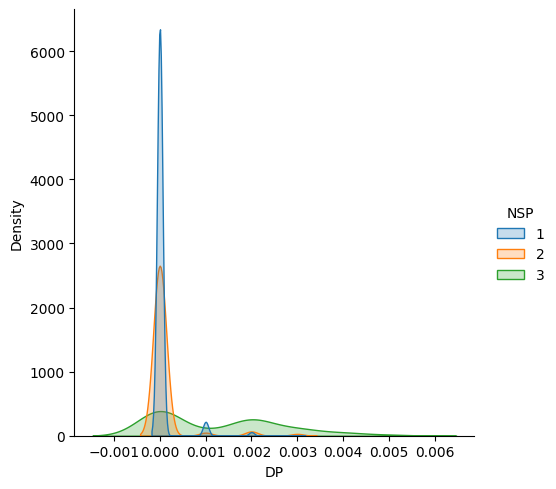

In [20]:
dataframe["NSP"] = dataframe["NSP"].astype("category")

# plot distribution of DP by NSP
sns.displot(
    data=dataframe,
    x="DP",
    hue="NSP",          # color by NSP category
    kind="kde",         # or use "hist" for histogram
    fill=True,          # fill under the curve
    common_norm=False   # keep distributions separate
)

plt.show()


Deductions: 
1. Most cases in NSP = 1 and NSP = 2 (Normal and Suspect Group) have low DP (Prolonged Decelarations)
2. For NSP = 3 (Pathalogic Group),  flatter and wider distribution, extends into higher DP values. NSP=3 tend to have higher DP values compared to NSP=1 and NSP =2. 

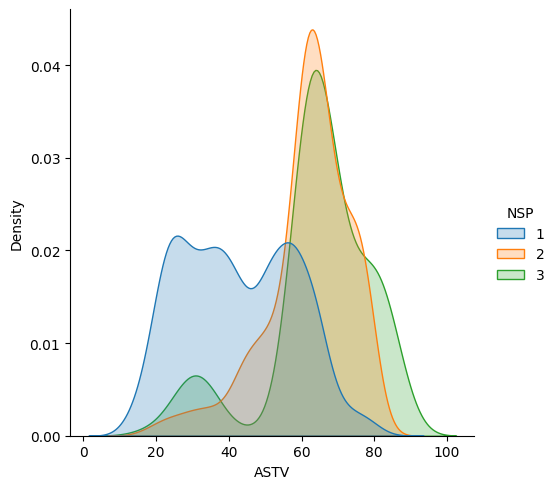

In [21]:
dataframe["NSP"] = dataframe["NSP"].astype("category")

# plot distribution of DP by NSP
sns.displot(
    data=dataframe,
    x="ASTV",
    hue="NSP",          # color by NSP category
    kind="kde",         # or use "hist" for histogram
    fill=True,          # fill under the curve
    common_norm=False   # keep distributions separate
)

plt.show()

Deductions: Normal Group usually has a more widespread distribution for ASTV (Variability) comapred to the Pathalogic and Suspect Group. Suspect and Pathalogic Group has a higher frequency of having ASTV values between 50 - 100. 

<Axes: xlabel='ASTV', ylabel='MSTV'>

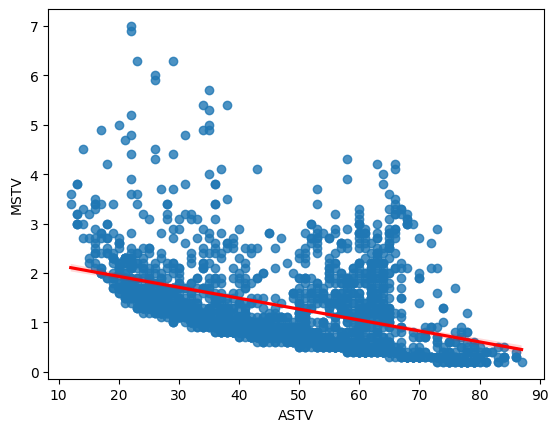

In [22]:
sns.regplot(x="ASTV", y="MSTV", data=dataframe, line_kws={"color":"red"})



Deductions: MSTV and ASTV are inversely proportional. As ASTV increases, the MSTV value decreases. 

Value Counts for Categorical Features

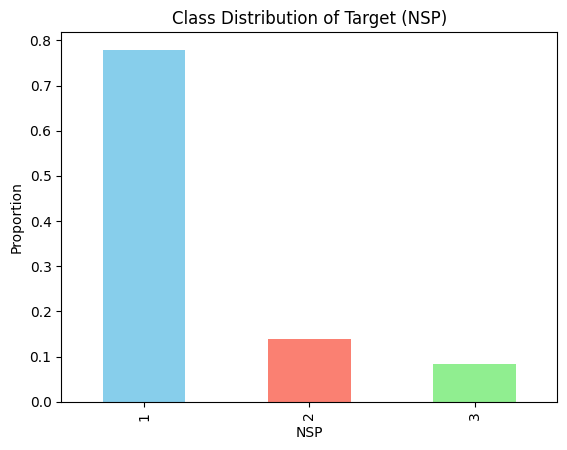

In [23]:
counts = dataframe['NSP'].value_counts(normalize=True)
counts.plot(kind='bar', color=['skyblue','salmon','lightgreen'])
plt.title("Class Distribution of Target (NSP)")
plt.xlabel("NSP")
plt.ylabel("Proportion")
plt.show()

There is a imbalance in the counts of each category in the target variable. (78% vs 22%) If we train using this, this could lead to the model constantly predicting '1' since it minimizes error overall. Accuracy will become misleading. 

### XGBoost Model

In [24]:
import xgboost
print(xgboost.__version__)

1.7.6


In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost.callback import EarlyStopping
Y = Y - 1

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [ ]:
print("Unique labels in Y:", np.unique(Y))



Unique labels in Y: [0 1 2]


In [28]:
model =XGBClassifier(
    objective = "multi:softprob",
    num_class = 3,
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=3,           # depth of each tree
    subsample=0.8,         # fraction of samples used per tree
    colsample_bytree=0.8,  # fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss",
    scale_pos_weight=1.0,
)

from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight="balanced", y=Y_train)

evals_result = {}
model.fit(
    X_train, Y_train,
    sample_weight = sample_weights,
    eval_set=[(X_train, Y_train), (X_test, Y_test)],
    verbose=False,
    callbacks=[EarlyStopping(rounds=20, save_best=True)]
)

evals_result = model.evals_result()

[00:37:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



c:\Users\Jambu\Datathon-\.venv\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Jambu\Datathon-\.venv\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


# Feature Importance Analysis

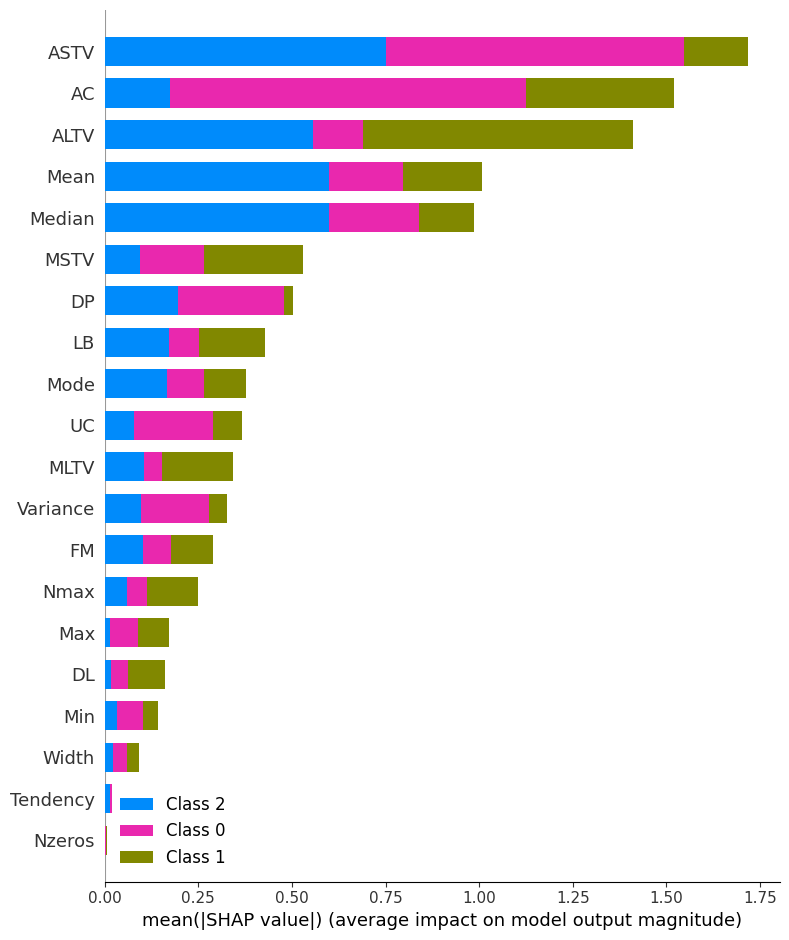

In [29]:
# length of the bar for every feature shows how much that feature influences predictions 
# the colour segments (blue, pink and olive) correspond to each class in the NSP variable
# We are trying to see how strongly each feature pushes predictions toward each class
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

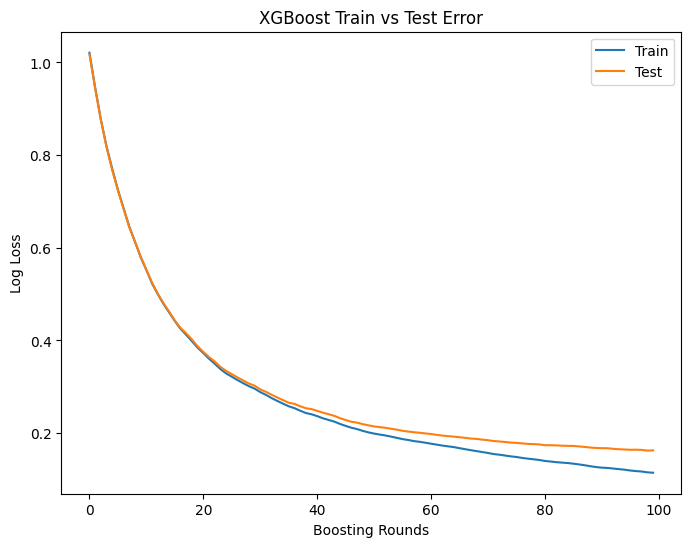

In [30]:
epochs = len(evals_result["validation_0"]["mlogloss"])
x_axis = range(0, epochs)

plt.figure(figsize=(8,6))
plt.plot(x_axis, evals_result["validation_0"]["mlogloss"], label="Train")
plt.plot(x_axis, evals_result["validation_1"]["mlogloss"], label="Test")
plt.xlabel("Boosting Rounds")
plt.ylabel("Log Loss")
plt.title("XGBoost Train vs Test Error")
plt.legend()
plt.show()


Train error is around the same as the Test Error: Implies that the model is not overfitting
If the model was overfitting, test error would have been significantly higher compared to train error.

In [31]:
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9357277882797732

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       420
           1       0.74      0.88      0.81        73
           2       0.88      1.00      0.94        36

    accuracy                           0.94       529
   macro avg       0.87      0.94      0.90       529
weighted avg       0.94      0.94      0.94       529



In [33]:
from sklearn.metrics import f1_score

y_true = Y_test
macro_f1 = f1_score(y_true, y_pred, average='macro')
print(macro_f1)


0.9003889804055071
